# Air Bnb Data Cleaning

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('Air_Bnb_Dataset.csv')  # Update the file name if necessary
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
# Inspect the dataset structure
print(data.info())
print(data.describe(include='all'))

# Check for duplicates
print(f'Total duplicates: {data.duplicated().sum()}')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Fill NaN values in numeric columns with the median
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Select non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Drop rows with missing values in non-numeric columns (in-place modification)
data.dropna(subset=non_numeric_cols, inplace=True)

In [9]:
# Standardize column names to title and replace spaces with underscores
data.columns = data.columns.str.title().str.replace(' ', '_')
data


,Id,Name,Host_Id,Host_Name,Neighbourhood_Group,Neighbourhood,Latitude,Longitude,Room_Type,Price,Minimum_Nights,Number_Of_Reviews,Last_Review,Reviews_Per_Month,Calculated_Host_Listings_Count,Availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


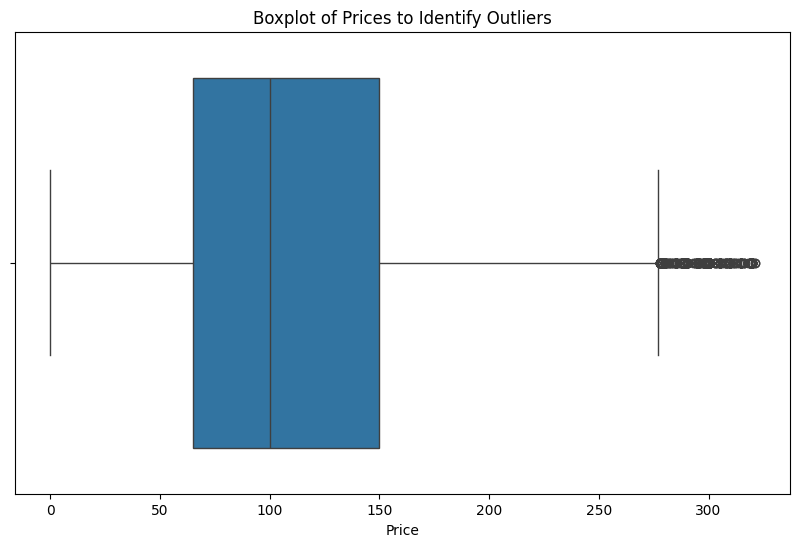

In [10]:
# Function for detecting outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Detect and remove outliers from 'price'
data = remove_outliers_iqr(data, 'Price')

# Visualize the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Prices to Identify Outliers')
plt.show()


In [11]:
data.columns

Index(['Id', 'Name', 'Host_Id', 'Host_Name', 'Neighbourhood_Group',
       'Neighbourhood', 'Latitude', 'Longitude', 'Room_Type', 'Price',
       'Minimum_Nights', 'Number_Of_Reviews', 'Last_Review',
       'Reviews_Per_Month', 'Calculated_Host_Listings_Count',
       'Availability_365'],
      dtype='object')

In [12]:
# Review the cleaned data
data.info()
data.describe()

# Save the cleaned dataset
data.to_csv('cleaned_AB_NYC_2019.csv', index=False)

# Check for duplicates
print(f'Total duplicates: {data.duplicated().sum()}')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
Index: 36744 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              36744 non-null  int64  
 1   Name                            36744 non-null  object 
 2   Host_Id                         36744 non-null  int64  
 3   Host_Name                       36744 non-null  object 
 4   Neighbourhood_Group             36744 non-null  object 
 5   Neighbourhood                   36744 non-null  object 
 6   Latitude                        36744 non-null  float64
 7   Longitude                       36744 non-null  float64
 8   Room_Type                       36744 non-null  object 
 9   Price                           36744 non-null  int64  
 10  Minimum_Nights                  36744 non-null  int64  
 11  Number_Of_Reviews               36744 non-null  int64  
 12  Last_Review                     36744